In [6]:
! pip install numpy pandas
! pip install matplotlib

You should consider upgrading via the 'D:\SCHOOL STUFF\MASTER'S - COMPUTER SCIENCE - AI\SEM 2\ISPR\assignments\assignment 1\venv\Scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'D:\SCHOOL STUFF\MASTER'S - COMPUTER SCIENCE - AI\SEM 2\ISPR\assignments\assignment 1\venv\Scripts\python.exe -m pip install --upgrade pip' command.


  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached fonttools-4.56.0-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)


In [7]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

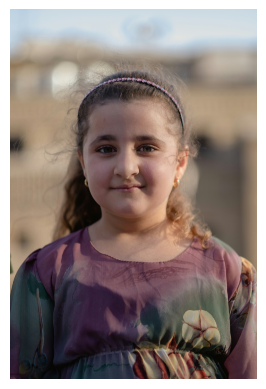

In [4]:
## loading the images

image1 = mpimg.imread("./images/img2.jpg")

plt.imshow(image1)
# plt.imshow(image2)
# plt.imshow(image3)
plt.axis('off')
plt.show()

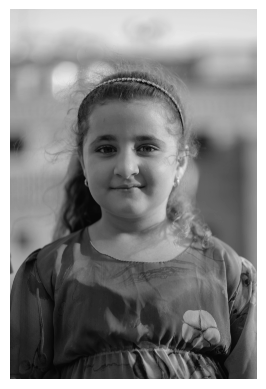

In [5]:
## convert the image in grayscale image
gray = 0.299 * image1[:,:,0] + 0.587 * image1[:,:,1] + 0.114 * image1[:,:,2]
plt.imshow(gray, cmap='gray')  # cmap = gray for correct display
plt.axis('off')
plt.show()

In [6]:
## Normalize the image
image1 = image1/255.0  ## To ensure the consistency of the pixel value scaling  for processing

[[[0.75294118 0.82745098 0.88627451]
  [0.75686275 0.83137255 0.89019608]
  [0.75686275 0.83137255 0.89019608]
  ...
  [0.78039216 0.85098039 0.90588235]
  [0.77647059 0.84705882 0.90196078]
  [0.77254902 0.84313725 0.89803922]]

 [[0.76078431 0.83529412 0.89411765]
  [0.76078431 0.83529412 0.89411765]
  [0.75686275 0.83137255 0.89019608]
  ...
  [0.78039216 0.85098039 0.90588235]
  [0.78039216 0.85098039 0.90588235]
  [0.77647059 0.84705882 0.90196078]]

 [[0.76862745 0.84313725 0.90196078]
  [0.76470588 0.83921569 0.89803922]
  [0.75686275 0.83137255 0.89019608]
  ...
  [0.78039216 0.85098039 0.90588235]
  [0.78039216 0.85098039 0.90588235]
  [0.78039216 0.85098039 0.90588235]]

 ...

 [[0.21176471 0.12156863 0.2       ]
  [0.20784314 0.11764706 0.19607843]
  [0.21568627 0.1254902  0.20392157]
  ...
  [0.59607843 0.43921569 0.44313725]
  [0.57647059 0.41960784 0.42352941]
  [0.61568627 0.45882353 0.4627451 ]]

 [[0.2        0.10980392 0.18823529]
  [0.20392157 0.11372549 0.19215686]
